In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt


In [3]:
img_path = '/content/alpine.jpg'
img = tf.keras.preprocessing.image.load_img(img_path) #uploading image
img_array = tf.keras.preprocessing.image.img_to_array(img) #converting image to array


In [4]:
gray_img_array = tf.image.rgb_to_grayscale(img_array)
gray_img = tf.image.rgb_to_grayscale(img_array) #converting greyscale image array back to image


In [5]:
gray_img_array


<tf.Tensor: shape=(3461, 5185, 1), dtype=float32, numpy=
array([[[110.200005],
        [111.199905],
        [110.200005],
        ...,
        [140.9599  ],
        [140.9599  ],
        [138.9493  ]],

       [[104.84151 ],
        [106.84131 ],
        [106.0694  ],
        ...,
        [142.6716  ],
        [140.6718  ],
        [143.1877  ]],

       [[101.358   ],
        [103.3578  ],
        [104.0696  ],
        ...,
        [148.9098  ],
        [147.90991 ],
        [150.8988  ]],

       ...,

       [[ 54.9344  ],
        [ 51.9347  ],
        [ 51.9347  ],
        ...,
        [ 44.055702],
        [ 41.0452  ],
        [ 44.7675  ]],

       [[ 56.2871  ],
        [ 52.2875  ],
        [ 49.689903],
        ...,
        [ 41.284004],
        [ 38.0455  ],
        [ 40.686203]],

       [[ 53.2874  ],
        [ 49.287804],
        [ 46.6902  ],
        ...,
        [ 38.2843  ],
        [ 35.0458  ],
        [ 36.6866  ]]], dtype=float32)>

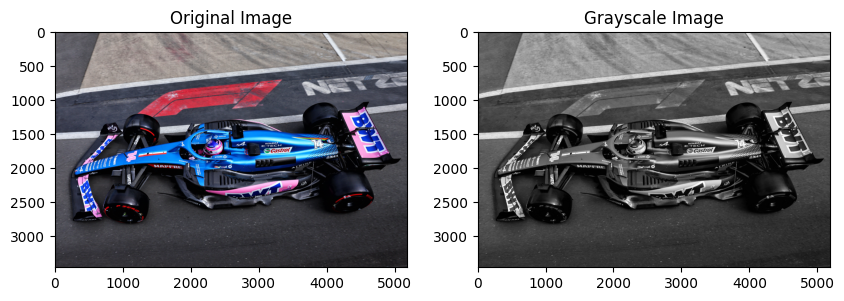

In [6]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_array/255.)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(gray_img, cmap='gray')
plt.title('Grayscale Image')

plt.show()

In [7]:


kernel = tf.constant([[1, 1, 1],
                      [1, -7, 1],
                      [1, 1, 1]], dtype=tf.float32)
kernel



<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[ 1.,  1.,  1.],
       [ 1., -7.,  1.],
       [ 1.,  1.,  1.]], dtype=float32)>

In [8]:
kernel = tf.reshape(kernel, [3,3,1,1])  # Add dimensions for channels and batch to the kernel
kernel

<tf.Tensor: shape=(3, 3, 1, 1), dtype=float32, numpy=
array([[[[ 1.]],

        [[ 1.]],

        [[ 1.]]],


       [[[ 1.]],

        [[-7.]],

        [[ 1.]]],


       [[[ 1.]],

        [[ 1.]],

        [[ 1.]]]], dtype=float32)>

In [9]:
image = tf.expand_dims(gray_img, axis=0) # add a batch dimension
image = tf.expand_dims(image, axis = -1) # add a channel dimension
convolved_image = tf.nn.conv2d(image,kernel, strides = [1,1,1,1], padding ='SAME')
convolved_image = tf.squeeze(convolved_image).numpy()

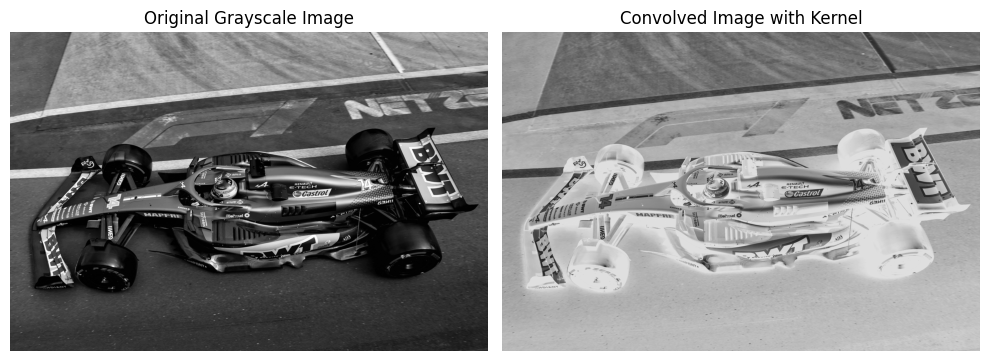

In [10]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(convolved_image, cmap='gray')
plt.title('Convolved Image with Kernel')
plt.axis('off')

plt.tight_layout()
plt.show()


In [11]:
input_image_tf = tf.expand_dims(tf.expand_dims(gray_img, axis=0), axis=-1)


max_pooled = tf.nn.max_pool(input_image_tf, ksize=[1, 2, 2, 1, 1], strides=[1, 2, 2, 1, 1], padding='SAME')
max_pooled = tf.squeeze(max_pooled).numpy()


inverted_image = tf.math.negative(input_image_tf)
min_pooled_inverted = tf.nn.max_pool(inverted_image, ksize=[1, 2, 2, 1, 1], strides=[1, 2, 2, 1, 1], padding='SAME')
min_pooled = tf.math.negative(min_pooled_inverted)
min_pooled = tf.squeeze(min_pooled).numpy()

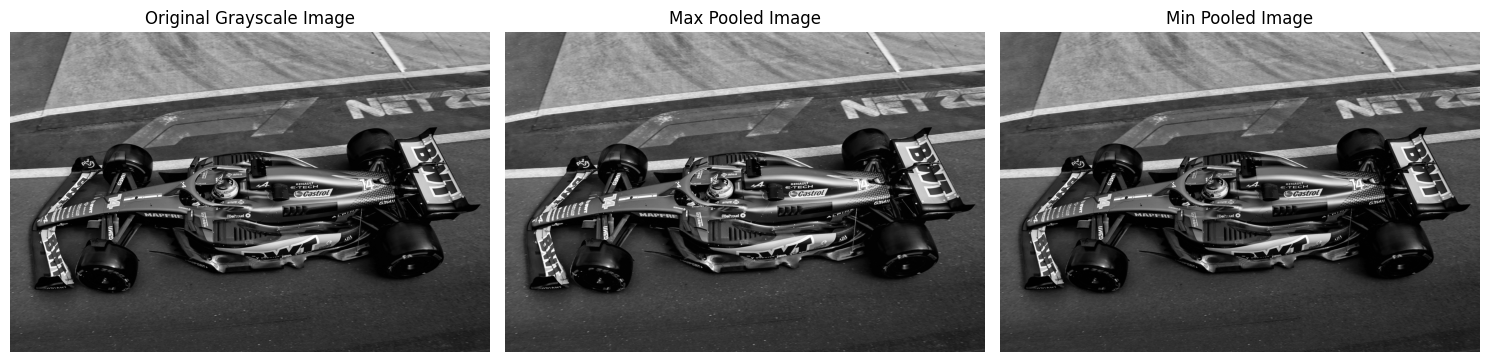

In [12]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(gray_img, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(max_pooled, cmap='gray')
plt.title('Max Pooled Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(min_pooled, cmap='gray')
plt.title('Min Pooled Image')
plt.axis('off')

plt.tight_layout()
plt.show()

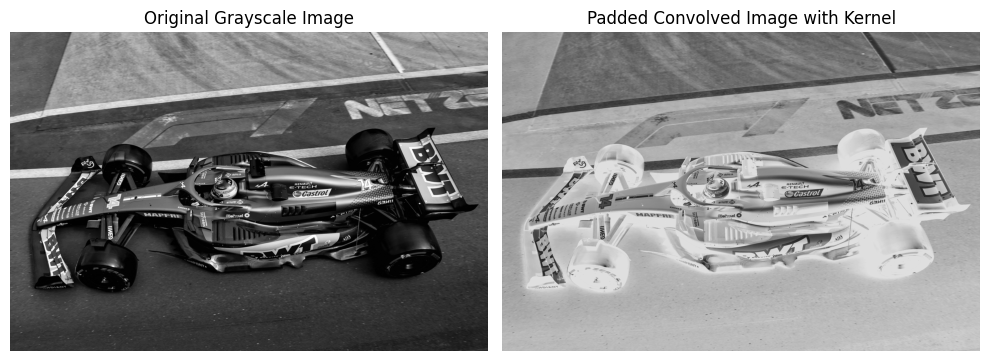

In [16]:
import tensorflow as tf
import matplotlib.pyplot as plt

# ... (your existing code for loading and processing the image)

# Define the kernel and reshape it
kernel = tf.constant([[1, 1, 1],
                      [1, -7, 1],
                      [1, 1, 1]], dtype=tf.float32)
kernel = tf.reshape(kernel, [3, 3, 1, 1])

# Add dimensions for batch and channel
image = tf.expand_dims(gray_img, axis=0)
image = tf.expand_dims(image, axis=-1)

# Apply convolution with padding
convolved_image = tf.nn.conv2d(image, kernel, strides=[1, 1, 1, 1], padding='SAME')

# Squeeze and convert to numpy array
convolved_image = tf.squeeze(convolved_image).numpy()

# Plot the padded image
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(convolved_image, cmap='gray')
plt.title('Padded Convolved Image with Kernel')
plt.axis('off')

plt.tight_layout()
plt.show()


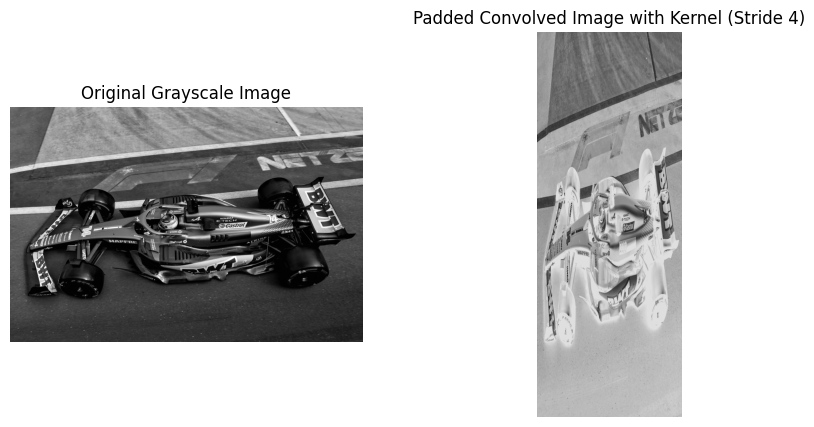

In [18]:
import tensorflow as tf
import matplotlib.pyplot as plt

# ... (your existing code for loading and processing the image)

# Define the kernel and reshape it
kernel = tf.constant([[1, 1, 1],
                      [1, -7, 1],
                      [1, 1, 1]], dtype=tf.float32)
kernel = tf.reshape(kernel, [3, 3, 1, 1])

# Add dimensions for batch and channel
image = tf.expand_dims(gray_img, axis=0)
image = tf.expand_dims(image, axis=-1)

# Apply convolution with padding and a stride of 4
convolved_image = tf.nn.conv2d(image, kernel, strides=[1, 4, 4, 1], padding='SAME')

# Squeeze and convert to numpy array
convolved_image = tf.squeeze(convolved_image).numpy()

# Plot the padded image with stride 4
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(convolved_image, cmap='gray')
plt.title('Padded Convolved Image with Kernel (Stride 4)')
plt.axis('off')


plt.show()


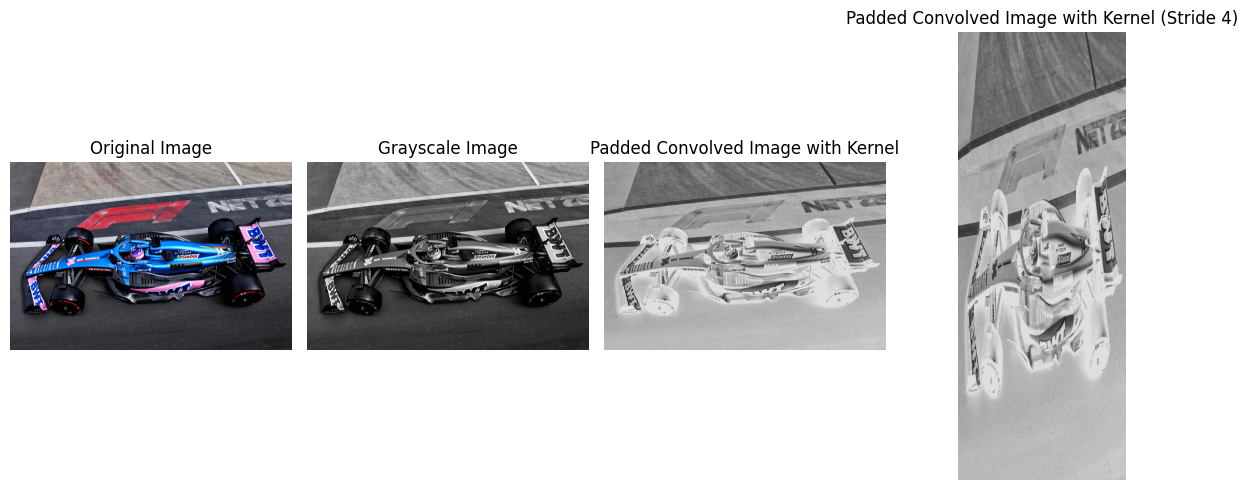

In [19]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load and preprocess the image
img_path = '/content/alpine.jpg'
img = tf.keras.preprocessing.image.load_img(img_path)
img_array = tf.keras.preprocessing.image.img_to_array(img)
gray_img_array = tf.image.rgb_to_grayscale(img_array)
gray_img = tf.image.rgb_to_grayscale(img_array)

# Define the kernel and reshape it
kernel = tf.constant([[1, 1, 1],
                      [1, -7, 1],
                      [1, 1, 1]], dtype=tf.float32)
kernel = tf.reshape(kernel, [3, 3, 1, 1])

# Add dimensions for batch and channel
image = tf.expand_dims(gray_img, axis=0)
image = tf.expand_dims(image, axis=-1)

# Apply convolution with padding
convolved_image = tf.nn.conv2d(image, kernel, strides=[1, 1, 1, 1], padding='SAME')
convolved_image = tf.squeeze(convolved_image).numpy()

# Apply convolution with padding and a stride of 4
convolved_image_stride4 = tf.nn.conv2d(image, kernel, strides=[1, 4, 4, 1], padding='SAME')
convolved_image_stride4 = tf.squeeze(convolved_image_stride4).numpy()

# Plot all the images
plt.figure(figsize=(15, 5))

# Original Image
plt.subplot(1, 5, 1)
plt.imshow(img_array / 255.)
plt.title('Original Image')
plt.axis('off')

# Grayscale Image
plt.subplot(1, 5, 2)
plt.imshow(gray_img, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

# Padded Convolved Image with Kernel
plt.subplot(1, 5, 3)
plt.imshow(convolved_image, cmap='gray')
plt.title('Padded Convolved Image with Kernel')
plt.axis('off')

# Padded Convolved Image with Kernel (Stride 4)
plt.subplot(1, 5, 4)
plt.imshow(convolved_image_stride4, cmap='gray')
plt.title('Padded Convolved Image with Kernel (Stride 4)')
plt.axis('off')

plt.tight_layout()
plt.show()
